### 90803 Data Cleaning and Question Definition
### EDA & Preliminary Modeling

**Team 14**

Chi-Shiun Tsai & Colton Lapp

This notebook is used for EDA and preliminary modeling of the data. We will be using the data_all.csv from the data_cleaned folder.

In [1]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import geopandas as gpd

pd.set_option('display.max_columns', 500)

### 1. Reading final dataset

In [2]:
base_dir = os.getcwd().split('/')
base_dir = '/'.join(base_dir[0:-1])

df = pd.read_csv(base_dir + '/final-project---data-cleaning-team14_cl_ct/data/data_cleaned/data_all.csv', low_memory=False)

In [3]:
df.head(10)

,Name,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,state,place,GEOID,Population 2019,Pop Chng %,land_area,water_area,cases_per_100K,deaths_per_100K
0,"New York city, New York",8379552,67046.0,635200.0,1489.0,2143429.0,42.002186,41.330205,28.925997,16.000569,1.125072,7.664813,17.610035,18.069295,14.947255,4.979001,1.908419,46.830821,24.736883,3.465794,10.448387,4.848242,3.531358,8.708186,1.403011,1.143271,1.902047,1.705306,8.383276,3.427486,5.030627,7.244218,6.556830,6.763679,0.208245,3.913145,0.719466,36,51000,3651000,8419316,-0.472295,777982727,434642000,5913.616647,220.640533
1,"Los Angeles city, California",3973278,65290.0,670700.0,1523.0,884176.0,38.099297,48.930480,48.066307,16.225771,1.007329,5.683670,19.986897,17.982834,12.855557,3.889962,1.788574,49.252959,4.056122,4.517605,33.341664,4.703748,4.288298,6.098239,2.086111,1.660996,1.278365,2.068393,7.988391,5.480588,3.824172,3.640193,5.838303,6.734288,0.256715,2.800433,0.887101,6,44000,644000,3966936,0.159871,1214591312,87468461,6178.068445,67.066531
2,"Chicago city, Illinois",2699347,62097.0,267600.0,1154.0,590848.0,45.110392,47.731581,28.628813,16.758127,1.200438,8.816058,20.245897,19.983537,12.676177,4.820647,1.800250,49.382610,12.919050,4.194570,23.775417,6.130186,4.004228,7.006176,1.199698,1.064406,2.110918,2.475895,5.359926,4.764597,5.445095,7.012289,6.614933,5.035996,0.455777,5.058372,0.868655,17,14000,1714000,2709534,-0.375969,588881854,17621529,7499.869841,133.847542
3,"Houston city, Texas",2313238,53600.0,186800.0,1086.0,499608.0,42.481318,51.539271,44.471948,13.576078,1.126473,8.046470,17.088946,15.180669,10.985813,3.587785,2.314159,47.686144,1.748501,2.939646,36.207040,4.086998,3.904484,5.408134,0.727076,0.958916,1.097639,2.983826,2.628869,10.073672,5.207333,5.392571,6.563527,5.208932,0.410939,4.663031,2.628869,48,35000,4835000,2310432,0.121449,1658093679,81248080,4991.616106,57.677759
4,"Phoenix city, Arizona",1658422,60914.0,250800.0,1100.0,258077.0,37.805637,68.233176,42.647046,11.954557,0.754512,11.002447,16.492967,14.118542,10.974408,3.490125,2.569792,48.881527,1.325778,4.060667,35.624769,3.587989,4.214126,6.030914,0.925096,1.144582,1.225804,4.415402,5.078864,6.408743,3.939890,4.255793,4.791905,3.291020,0.706636,2.782283,1.114433,4,55000,455000,1633017,1.555709,1340766401,3236736,7307.164034,116.139965
5,"Philadelphia city, Pennsylvania",1581531,49127.0,171600.0,1084.0,289341.0,43.573031,39.330687,15.055791,12.279304,1.155463,11.647258,20.233495,21.188077,13.746363,5.217413,1.983331,43.849283,10.188861,3.091182,21.703337,3.422001,3.145243,9.496810,0.972539,0.698247,2.367010,3.555542,7.354899,3.393484,6.226941,9.766802,8.457944,4.949192,0.408022,4.805217,0.868842,42,60000,4260000,1579075,0.155534,347781835,21806065,5098.950713,149.751446
6,"San Antonio c

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19495 entries, 0 to 19494
Data columns (total 46 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Name                                                       19495 non-null  object 
 1   Population 2020                                            19495 non-null  int64  
 2   Median Household Income                                    19495 non-null  float64
 3   Median Home Value                                          19495 non-null  float64
 4   Median Gross Rent                                          19495 non-null  float64
 5   Renter Household                                           19495 non-null  float64
 6   Total Housing Units                                        19495 non-null  float64
 7   Race: White Alone                                          19495 non-null  float64
 8   Hispan

Our target variable is the 'Pop Chng %' column. Let's take a look at the distribution of the target variable.

In [5]:
df['Pop Chng %'].value_counts()

 0.000000     152
-7.692308      15
-12.500000     14
-25.000000     14
 6.250000      13
             ... 
 2.183272       1
 22.755818      1
 0.362647       1
 3.329185       1
-75.000000      1
Name: Pop Chng %, Length: 17579, dtype: int64

# Dealing with outliers
Some of the cities in our dataset have very small populations. As a result of the base rate effect, they show very large changes in population as a percentage (i.e. a city that goes from 100 people to 50 people shows a very drastic reduction). We might not always be interested in these observations, so we will make a dataset that drops some of the small cities

In [6]:
#Dataset with cities that have more than 10K people only
df_big_cities = df[df['Population 2020']>10000]


#List outliers w/ regard to population change
df_big_cities.sort_values('Pop Chng %', ascending=False).head(10)

#Drop extreme population change events as greater than 50%
print("Dropping {} observations with greater than 50% change".format(df_big_cities[ abs(df_big_cities['Pop Chng %'])>50].shape[0] ))
df_big_cities = df_big_cities[ abs(df_big_cities['Pop Chng %'])<50]

Dropping 1 observations with greater than 50% change


# 2. Data visualization

#### EDA: Graphing boxplot of target variable and some scatterplots suggesting relationship between covid/population change

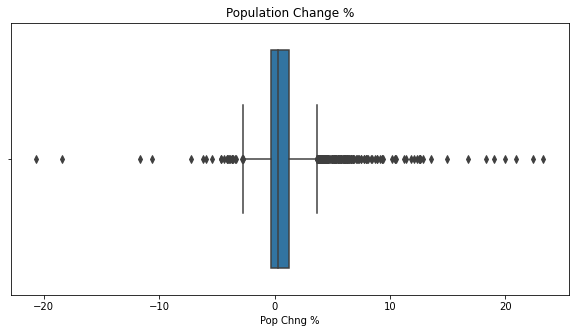

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_big_cities["Pop Chng %"])
plt.title("Population Change %")
plt.show()

We can tell that most cities experience no change in population. However, some cities experience a large change in population. 

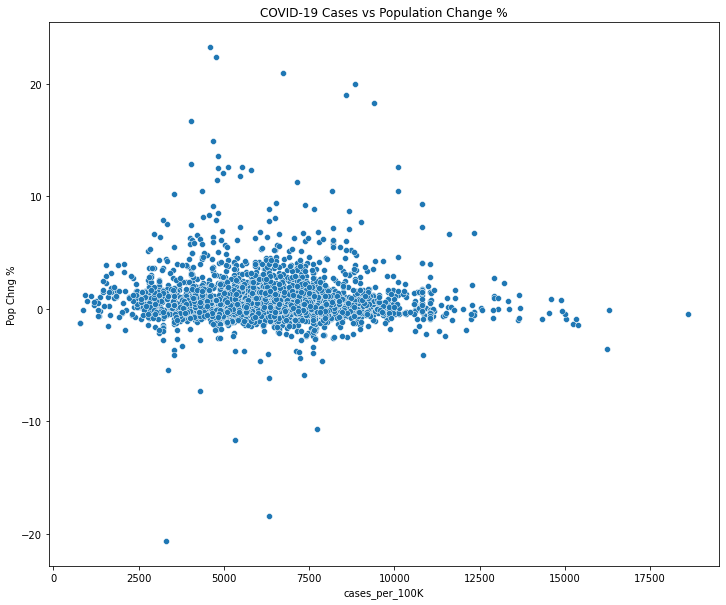

In [8]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_big_cities, x="cases_per_100K", y="Pop Chng %")
plt.title("COVID-19 Cases vs Population Change %")
plt.show()

There are some outliers in terms of the population change percentage. To take a closer look, we will focus on population change percentage within -5%-5% in the next section and draw the scatter plots.

In [9]:
df_big_cities_plot = df_big_cities[df_big_cities['Pop Chng %'].between(-5, 5)]
df_big_cities_plot['Pop Chng %'].value_counts()

 0.000000    6
-0.839689    2
-0.816648    2
-0.106941    2
-0.499486    2
            ..
 0.930096    1
 1.103393    1
 2.042689    1
-0.455455    1
-0.704785    1
Name: Pop Chng %, Length: 2975, dtype: int64

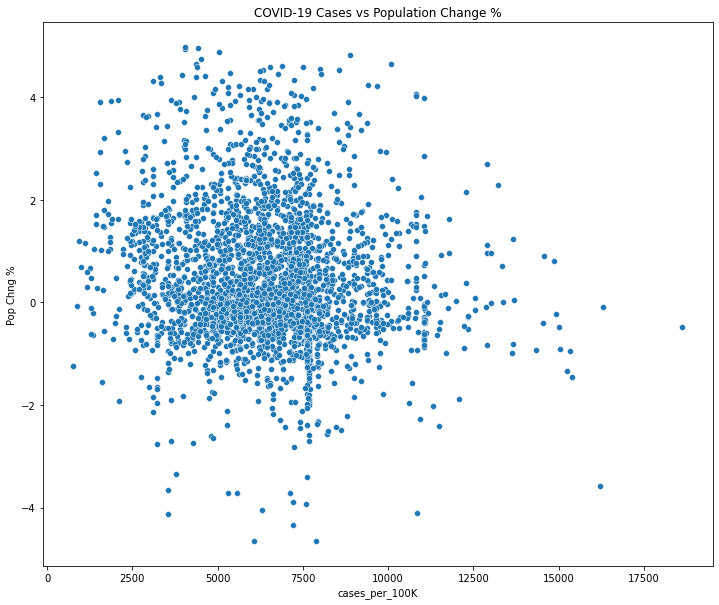

In [10]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_big_cities_plot, x="cases_per_100K", y="Pop Chng %")
plt.title("COVID-19 Cases vs Population Change %")
plt.show()

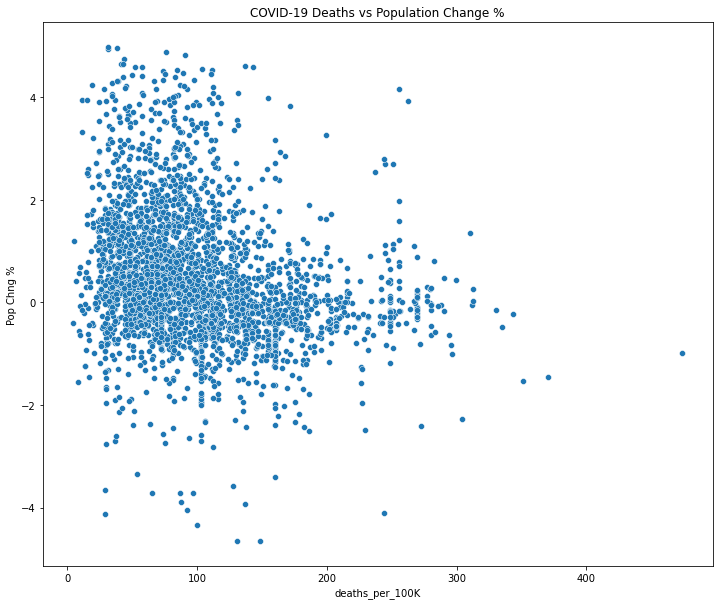

In [11]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=df_big_cities_plot, x="deaths_per_100K", y="Pop Chng %")
plt.title("COVID-19 Deaths vs Population Change %")
plt.show()

As we can see, there is no clear relationship between the population change percentage and the number of covid cases/deaths. Perhaps COVID-19 is not the main factor that affects the population change percentage.

# EDA: Graphing Densities of Key Predictor Variables for Cities that Grew vs Shrank

To see the population change percentage distribution for cities that grew and shrank, we will plot the densities of the key predictor variables for cities that grew and shrank.

Text(0.5, 1.01, "Density Plots of Predictor Variables for Cities that Grew/Didn't Grow Between 2019-2020")

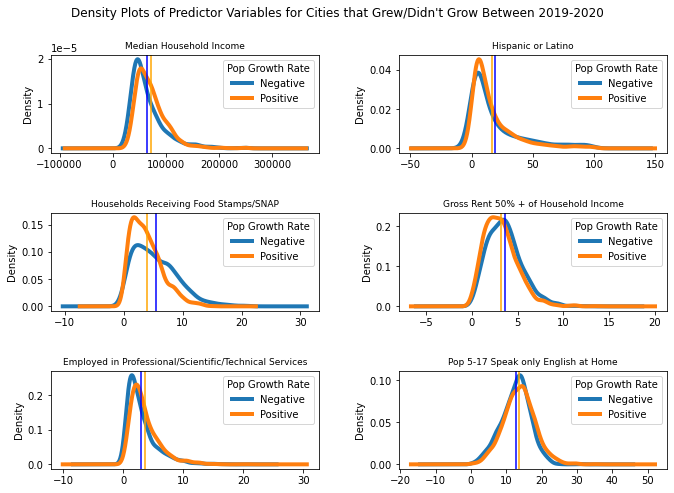

In [12]:
def city_growth(growth):
    if growth > 0:
        return "Positive"
    else:
        return "Negative"
        
df_big_cities['Pop Growth Rate'] = df_big_cities.apply(lambda x: city_growth(x["Pop Chng %"]),axis=1)

#df_big_cities['Grew'] = df_big_cities["Pop Chng %"].apply(lambda x: x>0)

var_list = ['Median Household Income', 
            'Hispanic or Latino',
            'Households Receiving Food Stamps/SNAP', 'Gross Rent 50% + of Household Income', 
           'Employed in Professional/Scientific/Technical Services',
           'Pop 5-17 Speak only English at Home']



fig, axs = plt.subplots( math.ceil(len(var_list)/2), 2, figsize=(30,30))

var_counter = 0
for var in var_list:
    
    var_counter+=1
    ax = plt.subplot( math.ceil(len(var_list)/2), 2, var_counter)
    
    data_wide = df_big_cities.pivot( columns='Pop Growth Rate',
                     values=var)
    data_wide.plot.density(ax = ax, figsize = (10, 7),
                       linewidth = 4)
    
    #Add Means as Vertical Lines
    mean_growth = df_big_cities[df_big_cities['Pop Growth Rate']=='Positive'][var].mean()
    mean_shrink = df_big_cities[df_big_cities['Pop Growth Rate']=='Negative'][var].mean()
    plt.axvline(x = mean_growth, color = 'orange', label = 'Growth Mean')
    plt.axvline(x = mean_shrink, color = 'b', label = 'Shrink Mean')
    
    ax.set_title(var, fontsize=9)
    
fig.tight_layout(pad=3)
fig.suptitle("Density Plots of Predictor Variables for Cities that Grew/Didn't Grow Between 2019-2020", y=1.01)

# EDA: Maps of Population Changes

### First we need to download/read in shape files again

In [13]:
#Download USA states shape file
usa_shp = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')
usa_shp['STATEFP'] = usa_shp['STATEFP'].apply(lambda x: int(x) )

#Read in places shape file
working_dir = os.getcwd()
places_shp = gpd.read_file( working_dir + '/data/shape_files/CensusPlaces')
places_shp['GEOID'] = places_shp['GEOID'].astype(str).astype(int)

#Merge geometry into dataframe
temp_df = df_big_cities.merge(places_shp, on='GEOID')
temp_df = gpd.GeoDataFrame(temp_df)
temp_df.head()

,Name,Population 2020,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,state,place,GEOID,Population 2019,Pop Chng %,land_area,water_area,cases_per_100K,deaths_per_100K,Pop Growth Rate,STATEFP,PLACEFP,PLACENS,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,"New York city, New York",8379552,67046.0,635200.0,1489.0,2143429.0,42.002186,41.330205,28.925997,16.000569,1.125072,7.664813,17.610035,18.069295,14.947255,4.979001,1.908419,46.830821,24.736883,3.465794,10.448387,4.848242,3.531358,8.708186,1.403011,1.143271,1.902047,1.705306,8.383276,3.427486,5.030627,7.244218,6.556830,6.763679,0.208245,3.913145,0.719466,36,51000,3651000,8419316,-0.472295,777982727,434642000,5913.616647,220.640533,Negative,36,51000,02395220,New York,New York city,25,C1,Y,N,G4110,A,777982727,434642000,+40.6634682,-073.9386968,"MULTIPOLYGON (((-74.04075 40.70017, -74.04073 ..."
1,"Los Angeles city, California",3973278,65290.0,670700.0,1523.0,884176.0,38.099297,48.930480,48.066307,16.225771,1.007329,5.683670,19.986897,17.982834,12.855557,3.889962,1.788574,49.252959,4.056122,4.517605,33.341664,4.703748,4.288298,6.098239,2.086111,1.660996,1.278365,2.068393,7.988391,5.480588,3.824172,3.640193,5.838303,6.734288,0.256715,2.800433,0.887101,6,44000,644000,3966936,0.159871,1214591312,87468461,6178.068445,67.066531,Positive,06,44000,02410877,Los Angeles,Los Angeles city,25,C1,Y,N,G4110,A,1214591312,87468461,+34.0193936,-118.4108248,"POLYGON ((-118.66818 34.18987, -118.66815 34.1..."
2,"Chicago city, Illinois",2699347,62097.0,267600.0,1154.0,590848.0,45.110392,47.731581,28.628813,16.758127,1.200438,8.816058,20.245897,19.983537,12.676177,4.820647,1.800250,49.382610,12.919050,4.194570,23.775417,6.130186,4.004228,7.006176,1.199698,1.064406,2.110918,2.475895,5.359926,4.764597,5.445095,7.012289,6.614933,5.035996,0.455777,5.058372,0.868655,17,14000,1714000,2709534,-0.375969,588881854,17621529,7499.869841,133.847542,Negative,17,14000,00428803,Chicago,Chicago city,25,C5,Y,N,G4110,A,588881854,17621529,+41.8375511,-087.6818441,"POLYGON ((-87.94010 42.00079, -87.93993 42.000..."
3,"Houston city, Texas",2313238,53600.0,186800.0,1086.0,499608.0,42.481318,51.539271,44.471948,13.576078,1.126473,8.046470,17.088946,15.180669,10.985813,3.587785,2.314159,47.686144,1.748501,2.939646,36.207040,4.086998,3.904484,5.408134,0.727076,0.958916,1.097639,2.983826,2.628869,10.073672,5.207333,5.392571,6.563527,5.208932,0.410939,4.663031,2.628869,48,35000,4835000,2310432,0.121449,1658093679,81248080,4991.616106,57.677759,Positive,48,35000,02410796,Houston,Houston city,25,C1,Y,N,G4110,A,1658093679,81248080,+29.7857435,-095.3888059,"MULTIPOLYGON (((-95.16953 29.80720, -95.16929 ..."
4,"Phoenix city, Arizona",1658422,60914.0,250800.0,1100.0,258077.0,37.805637,68.233176,42

## Now Map 4 different views of population change in US
We can use this in the future for clustering

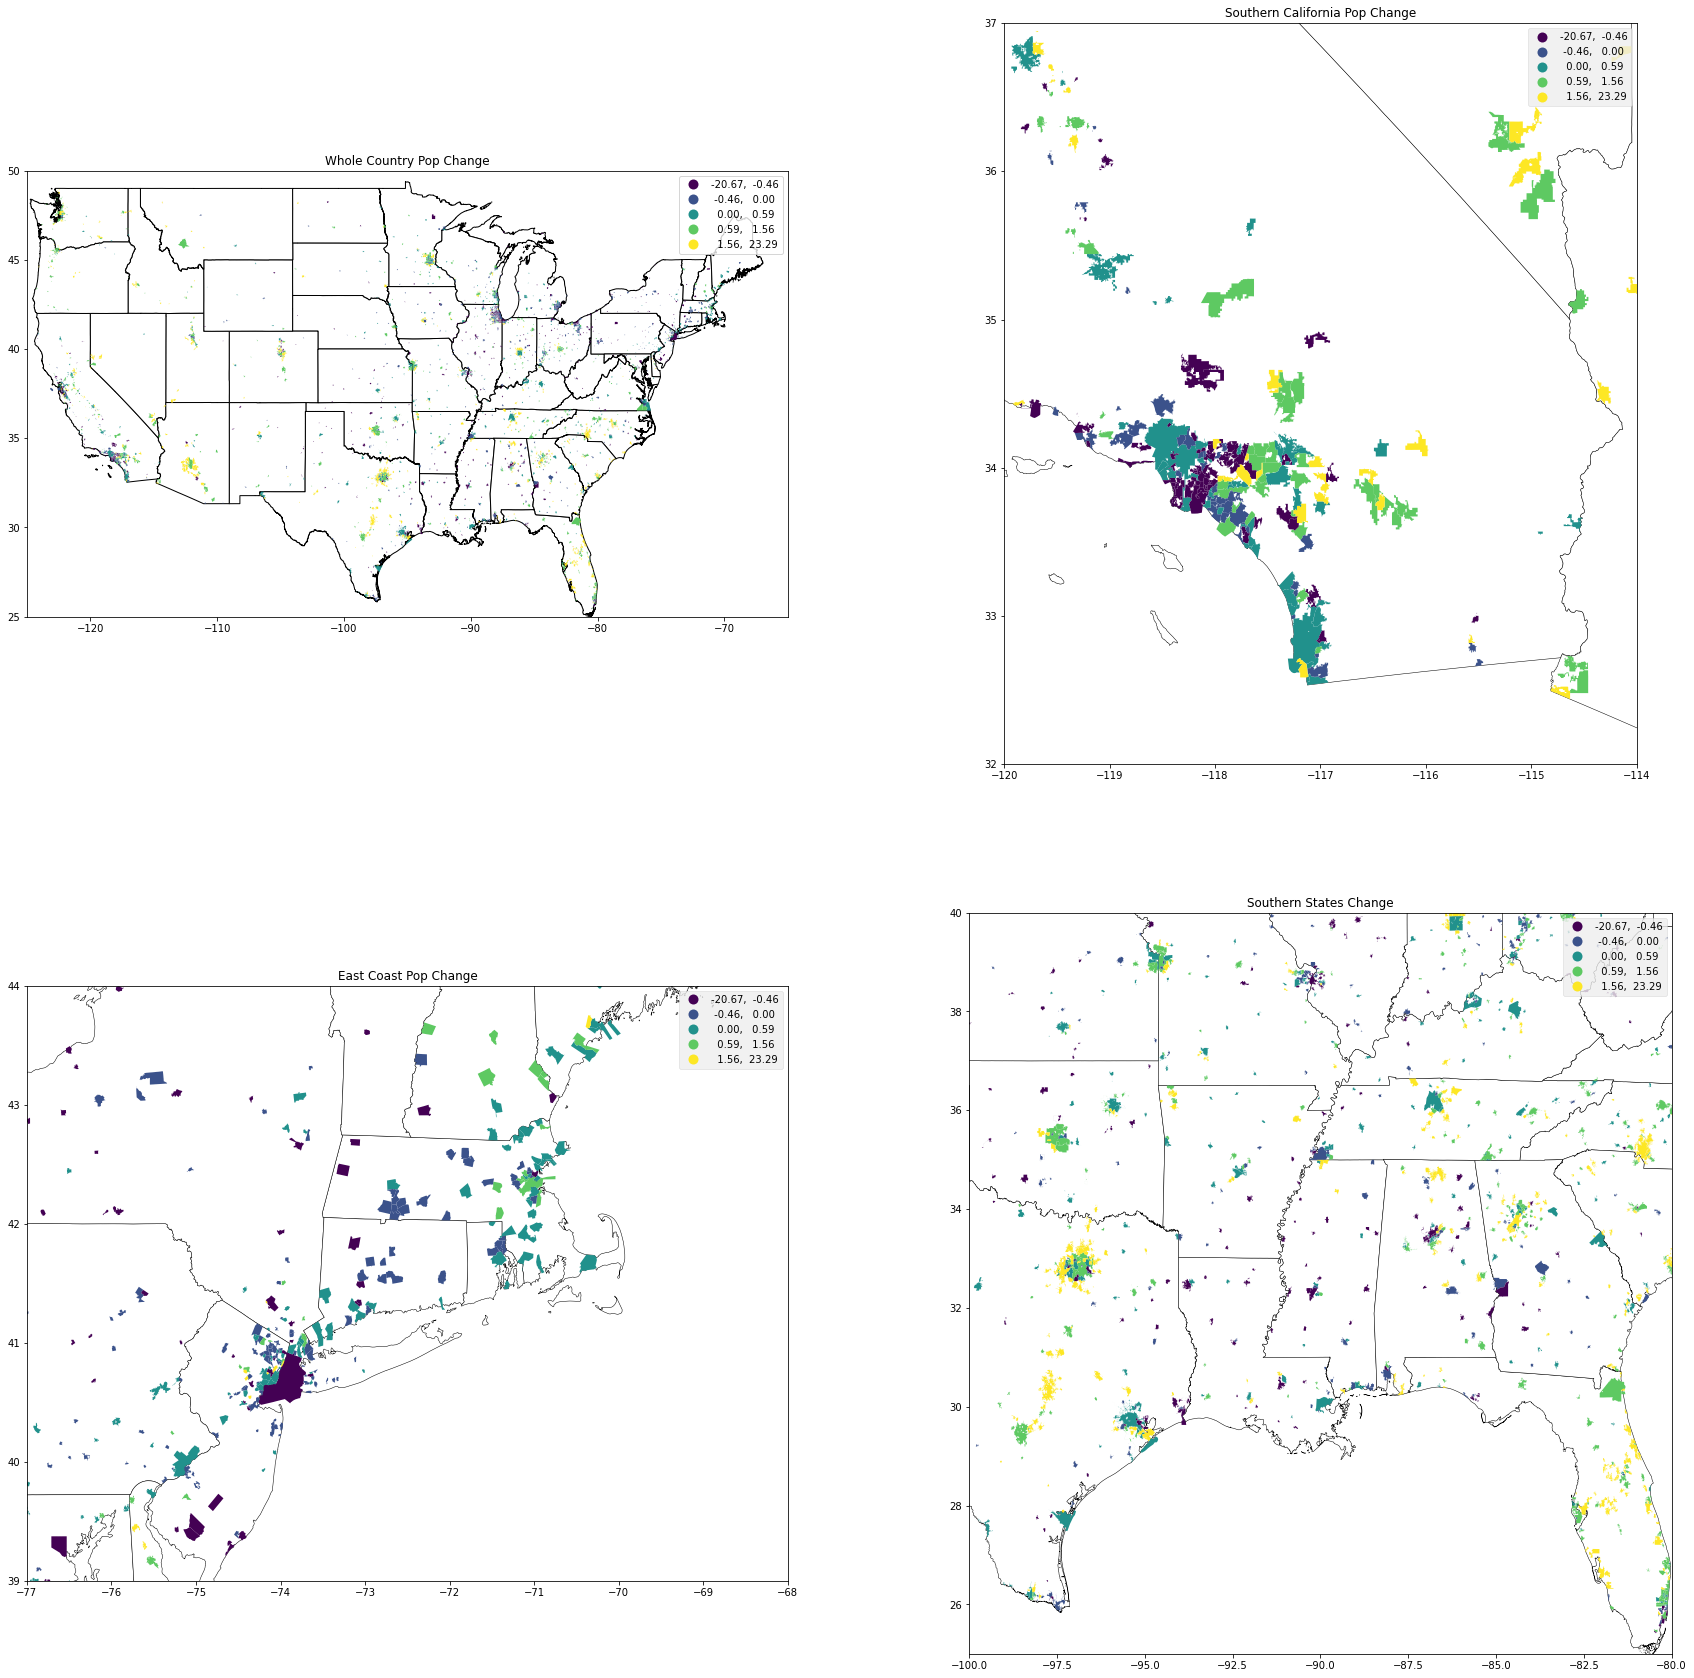

In [14]:
fig, axs = plt.subplots(2,2, figsize=(30, 30))
axs = axs.flatten()

for plot in range(0,4):

    
    #Plot State outline
    usa_shp.plot(ax=axs[plot],color='white', edgecolor='black')
    axs[plot].set_aspect('equal')

    # Plot data
    temp_df.plot(column = "Pop Chng %",
                       ax=axs[plot], kind='geo', legend=True,
                      scheme='quantiles')

    # Stylize plots
    plt.style.use('bmh')

    # Set axis
    if plot ==0:
        axs[plot].set_xlim([-125,-65])
        axs[plot].set_ylim([25,50])
        axs[plot].set_title('Whole Country Pop Change', fontsize=12)
    if plot ==1:
        axs[plot].set_xlim([-120,-114])
        axs[plot].set_ylim([32,37])
        axs[plot].set_title('Southern California Pop Change', fontsize=12)
    if plot ==2:
        axs[plot].set_xlim([-77, -68])
        axs[plot].set_ylim([39,44])
        axs[plot].set_title('East Coast Pop Change', fontsize=12)
    if plot ==3:
        axs[plot].set_xlim([-100,-80])
        axs[plot].set_ylim([25,40])
        axs[plot].set_title('Southern States Change', fontsize=12)
        



### 3. Preliminary Modeling

We will test linear regression first.

In [15]:
y = df_big_cities['Pop Chng %']

X1, X2  = df_big_cities.iloc[:, 2:37], df_big_cities.iloc[:, 42:46]
X = pd.concat([X1, X2], axis=1)
X

,Median Household Income,Median Home Value,Median Gross Rent,Renter Household,Total Housing Units,Race: White Alone,Hispanic or Latino,Population Age 25 or Older: Bachelor`s Degree,Population Age 25 or Older: Doctorate Degree,Pop 5-17 Speak only English at Home,Population Age 15 or Older Never Married,Population Age 15 or Older Never Married 2,Population Age 65 or more,Pop 65 or more Living in Nonfamily Households,Females 20-64 w Own Children 0-17,Workers Age 16 or more,Workers 16 or more who Took Public Transportation to work,Workers 16 or more who Worked at Home,Workers 16 or more who Drove Alone to Work,Employed in Professional/Scientific/Technical Services,Employed in Accommodation/Food Services,Employed in Health Care/Social Assistance,Employed in Arts/Entertainment/Recreation,Male 16+: Private For-Profit Self-Emp Inc Bus,Male 16+: Private Not-For-Profit Worker,Civilian Population 18+: Veteran,Population 35-64: Medicaid Coverage Only,Population 35-64: No Health Insurance Coverage,Households with No Internet Acces,Households Receiving Food Stamps/SNAP,Households Below the Poverty Leve,Gross Rent 50% + of Household Income,Owner Households by Year Moved In: 2017 or Later,Total Vacant Housing Units,Housing Units Built in 2014 or Later,land_area,water_area,cases_per_100K,deaths_per_100K
0,67046.0,635200.0,1489.0,2143429.0,42.002186,41.330205,28.925997,16.000569,1.125072,7.664813,17.610035,18.069295,14.947255,4.979001,1.908419,46.830821,24.736883,3.465794,10.448387,4.848242,3.531358,8.708186,1.403011,1.143271,1.902047,1.705306,8.383276,3.427486,5.030627,7.244218,6.556830,6.763679,0.208245,3.913145,0.719466,777982727,434642000,5913.616647,220.640533
1,65290.0,670700.0,1523.0,884176.0,38.099297,48.930480,48.066307,16.225771,1.007329,5.683670,19.986897,17.982834,12.855557,3.889962,1.788574,49.252959,4.056122,4.517605,33.341664,4.703748,4.288298,6.098239,2.086111,1.660996,1.278365,2.068393,7.988391,5.480588,3.824172,3.640193,5.838303,6.734288,0.256715,2.800433,0.887101,1214591312,87468461,6178.068445,67.066531
2,62097.0,267600.0,1154.0,590848.0,45.110392,47.731581,28.628813,16.758127,1.200438,8.816058,20.245897,19.983537,12.676177,4.820647,1.800250,49.382610,12.919050,4.194570,23.775417,6.130186,4.004228,7.006176,1.199698,1.064406,2.110918,2.475895,5.359926,4.764597,5.445095,7.012289,6.614933,5.035996,0.455777,5.058372,0.868655,588881854,17621529,7499.869841,133.847542
3,53600.0,186800.0,1086.0,499608.0,42.481318,51.539271,44.471948,13.576078,1.126473,8.046470,17.088946,15.180669,10.985813,3.587785,2.314159,47.686144,1.748501,2.939646,36.207040,4.086998,3.904484,5.408134,0.727076,0.958916,1.097639,2.983826,2.628869,10.073672,5.207333,5.392571,6.563527,5.208932,0.410939,4.663031,2.628869,1658093679,81248080,4991.616106,57.677759
4,60914.0,250800.0,1100.0,258077.0,37.805637,68.233176,42.647046,11.954557,0.754512,11.002447,16.492967,14.118542,10.974408,3.490125,2.569792,48.881527,1.325778,4.060667,35.624769,3.587989,4.214126,6.030914,0.925096,1.144582,1.225804,4.415402,5.078864,6.408743,3.939890,4.255793,4.791905,3.291020,0.706636,2.782283,1.114433,1340766401,3236736,7307.164034,116.139965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,45267.0,85600.0,677.0,1394.0,49.625636,96.266347,2.595588,8.655286,0.159728,15.543576,10.741739,9.094539,20.654887,5.700309,1.757013,45.652391,0.189678,0.818608,39.932115,0.349406,3.334332,6.349206,0.738744,0.499151,1.806928,6.478986,3.623839,3.573924,7.846661,6.778477,7.048018,2.485774,1.417590,4.831786,0.079864,24956519,616049,8375.536893,137.829348
3091,68306.0,167000.0,766.0,1160.0,43.497803,92.608869,7.011586,10.896924,0.399521,16.640032,10.557331,9.069117,18.357970,6.152617,3.575709,52.167399,0.229724,1.857771,43.397922,1.088694,4.744307,6.801838,0.069916,1.048742,1.398322,6.292449,1.997603,1.957651,3.935278,2.546944,2.497004,1.667998,0.279664,2.526968,1.498202,23306564,22701,13336

Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

Modeling

In [17]:
# Initialize the linear regression object
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [18]:
# Coefficients for each variable
pd.DataFrame(reg.coef_, 
             X_train.columns, 
             columns = ['Coefficient'])

,Coefficient
Median Household Income,-2.745889e-06
Median Home Value,-2.348314e-07
Median Gross Rent,-1.286217e-10
Renter Household,5.340802e-08
Total Housing Units,-8.314271e-02
Race: White Alone,5.780250e-03
Hispanic or Latino,-2.834672e-03
Population Age 25 or Older: Bachelor`s Degree,3.445011e-03
Population Age 25 or Older: Doctorate Degree,-8.868726e-03
Pop 5-17 Speak only English at Home,5.097834e-03


In [19]:
print("Train R-squared:", reg.score(X_train, y_train))
print("Test R-squared:", reg.score(X_test, y_test))

Train R-squared: 0.47878607596406486
Test R-squared: 0.31967778958902415


In [20]:
y_pred = reg.predict(X_test)

In [21]:
mean_squared_error(y_test, y_pred)

3.6521393759593153

The R-squared for our test set is slightly lower than the one for our train set. The mean squared error is quite high. Therefore, linear regression might not be ideal for this task. 

These are the things we will try for the next step:
1. **Use a different model to predict the target variable**, such as logistic regression or random forest. We might use dimensionality reduction to reduce the number of features. 

2. **Use a different target variable**. We plan to use 'population growth' as our target variable, and use classification models to predict whether a city will experience population growth or not.

3. **Use crime data**. For this preliminary analysis, we do not include crime data. We can use crime data to predict the target variable.

### References
1. https://www.geeksforgeeks.org/multiple-density-plots-with-pandas-in-python/#
2. https://engineeringfordatascience.com/posts/matplotlib_subplots/
3. https://www.geeksforgeeks.org/how-to-set-a-single-main-title-for-all-the-subplots-in-matplotlib/
4. https://stackoverflow.com/questions/55767312/how-to-position-suptitle
5. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
6. https://gis.stackexchange.com/questions/404776/plotting-multiple-maps-using-geopandas